In [13]:
import pandas as pd

# F = 1이면 데이터 기여도만 볼거다. 0이면 데이터 기여도는 신경 안쓰겠다
# W = 1이면 배터리 잔량만 보겠다. 0이면 C-rate만 보겠다.

# 4개의 파일명 리스트 _f_w.csv
f_w = "1_0"
prefix = f"_{f_w}.csv"
file_names = ['proposed.csv', 'random.csv','oort.csv' , 'towards.csv']
_file_names = []
for file in file_names:
    _file = file.split(".")[0]
    _file = _file + prefix
    _file_names.append(_file)

file_names = _file_names

# 빈 DataFrame 생성
merged_data = pd.DataFrame()

# 각 파일을 순회하면서 데이터를 읽어와 병합
for file_name in file_names:
    data = pd.read_csv(file_name)  # CSV 파일 읽기
    data['method'] = data['method'].replace('towards', 'EAEL')
    data['method'] = data['method'].replace('oort', 'Oort')
    data['method'] = data['method'].replace('proposed', 'Proposed')
    data['method'] = data['method'].replace('random', 'Random')
    merged_data = pd.concat([merged_data, data], ignore_index=True)  # 데이터 병합

# 특정 컬럼 제거
column_to_remove = 'Unnamed: 0'  # 삭제할 컬럼 이름을 여기에 입력
merged_data = merged_data.drop(column_to_remove, axis=1)

# 병합된 데이터를 새로운 파일에 저장
merged_data.to_csv(f'preprocessed_data_{f_w}.csv', index=False)


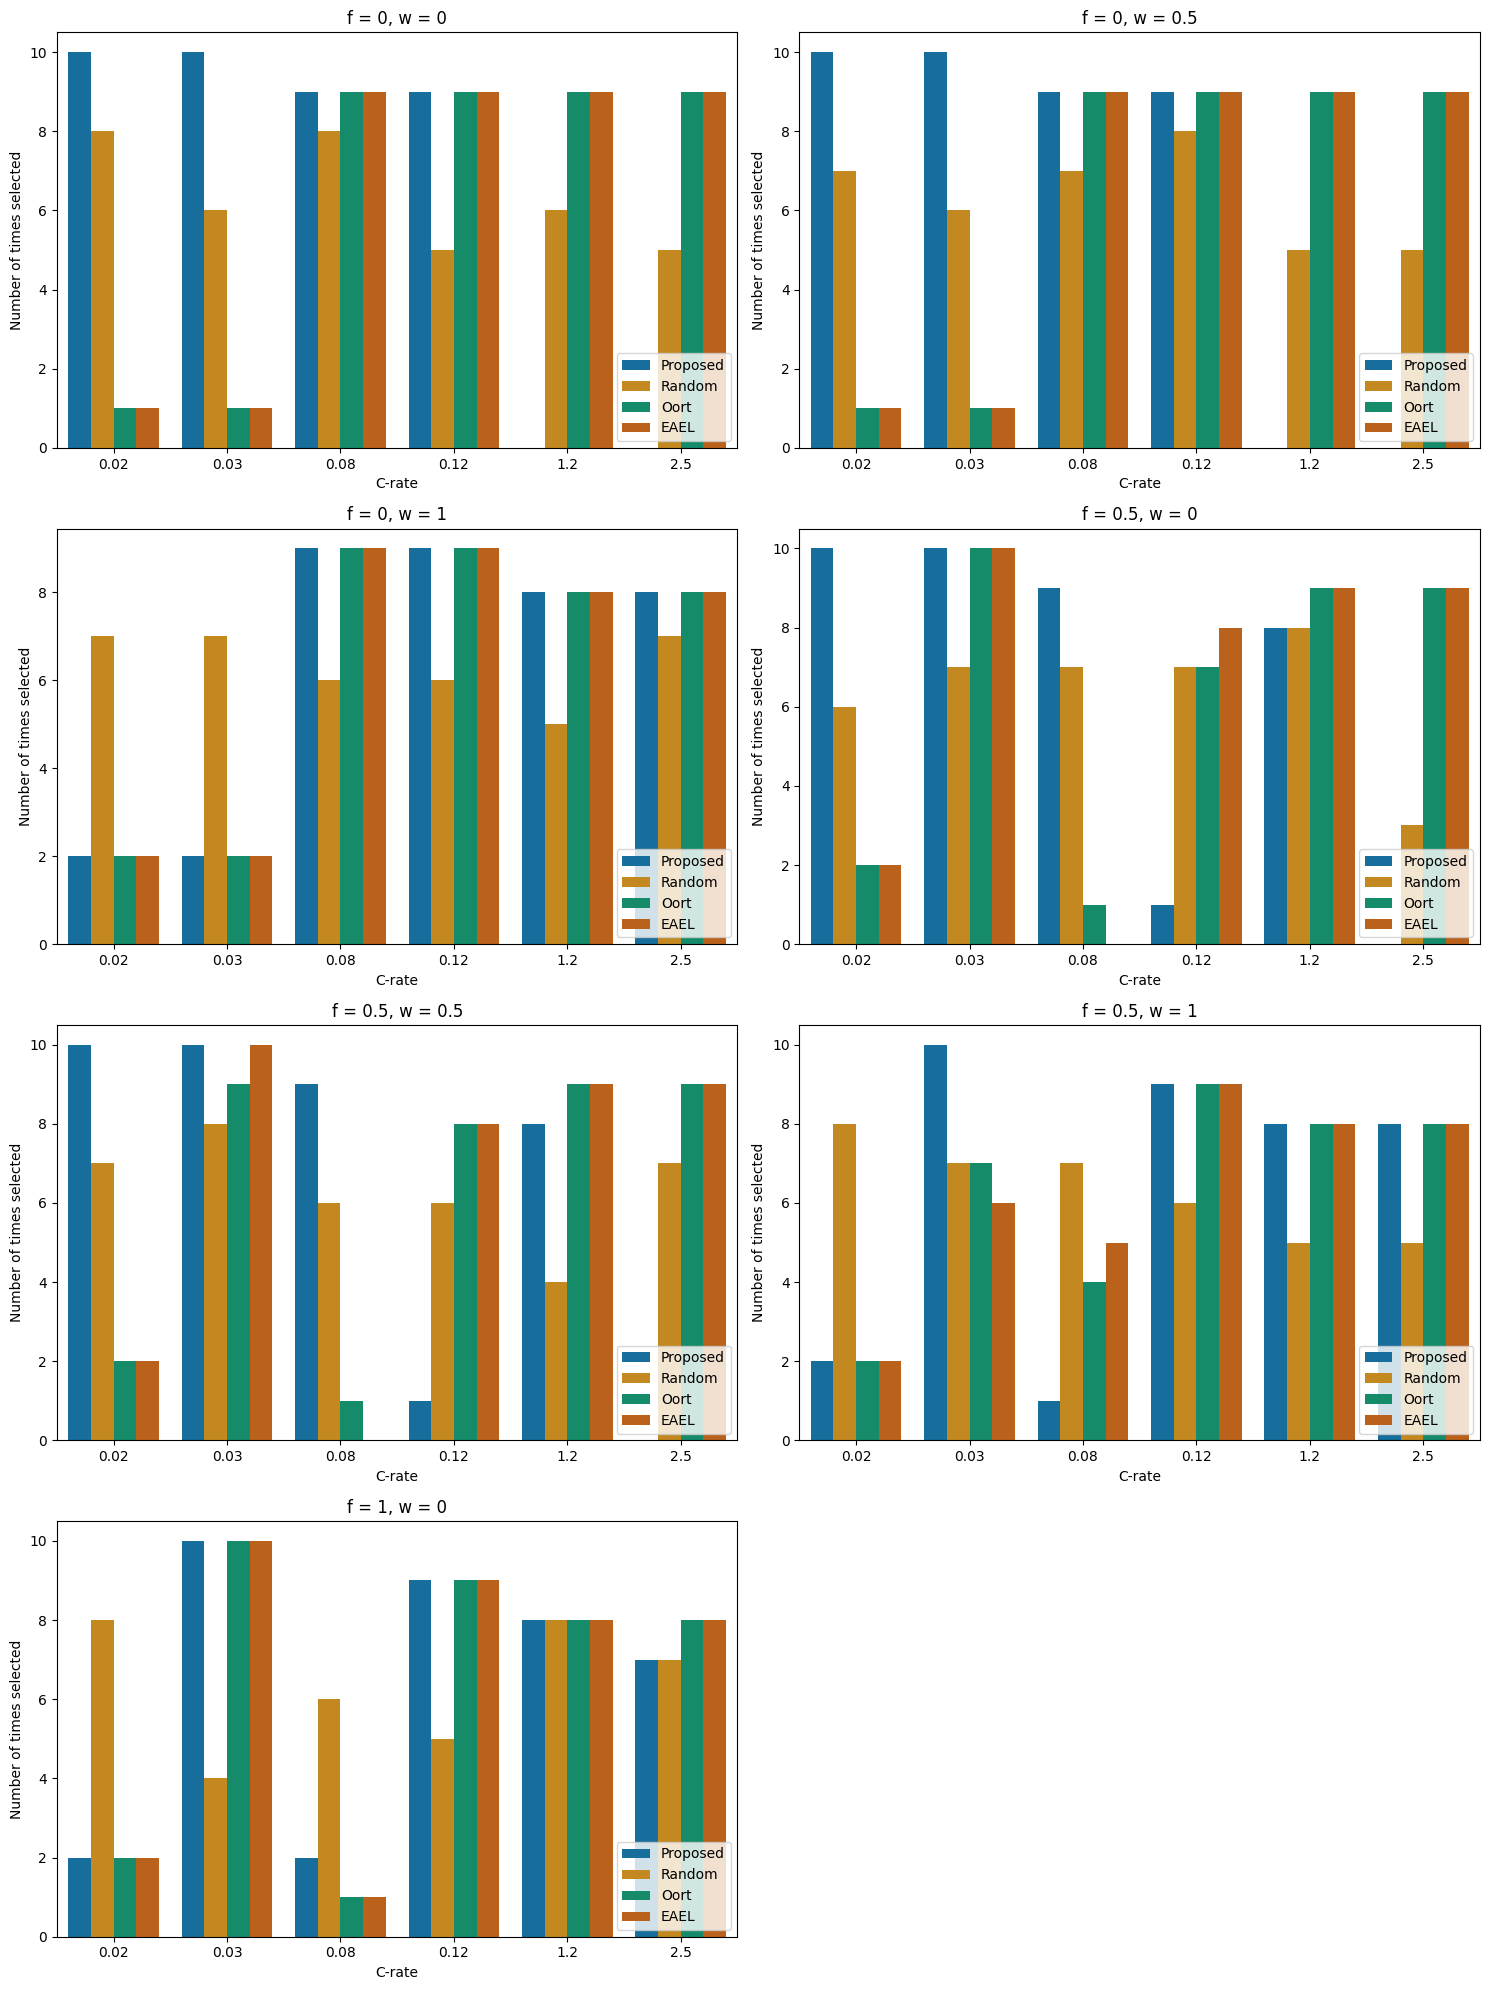

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 전처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):
    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 1]
    data = data[data['learning_step'] == 'training']

    # 소수 2번째 자리까지 반올림
    data['c-rate'] = round(data['charge_speed'] / 100, 2)

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['count_selected'] = data.groupby(['method','c-rate'])['selected'].transform('sum')

    # 바 그래프 그리기
    sns.barplot(x='c-rate', y='count_selected', hue='method', palette='colorblind', data=data, ax=ax)

    ax.legend(loc='lower right')  # 범례 위치 조정
    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('C-rate')
    ax.set_ylabel('Number of times selected')

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    process_and_plot(data, axs[row][col], title)

# 불필요한 서브그래프 숨기기
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()


# Training 정확도 - 라운드

0 0
107    0.921646
225    0.915630
341    0.853163
457    0.855772
Name: avg_accuracy, dtype: float64
0 0.5
107    0.914141
225    0.935562
341    0.833537
457    0.834894
Name: avg_accuracy, dtype: float64
0 1
109    0.850652
225    0.907318
341    0.850256
457    0.846826
Name: avg_accuracy, dtype: float64
0.5 0
108    0.809615
224    0.822443
341    0.834995
457    0.827537
Name: avg_accuracy, dtype: float64
0.5 0.5
108    0.795230
224    0.844512
341    0.843018
457    0.810757
Name: avg_accuracy, dtype: float64
0.5 1
109    0.819119
225    0.938244
341    0.836304
457    0.859157
Name: avg_accuracy, dtype: float64
1 0
109    0.810270
225    0.835693
341    0.824628
457    0.817690
Name: avg_accuracy, dtype: float64


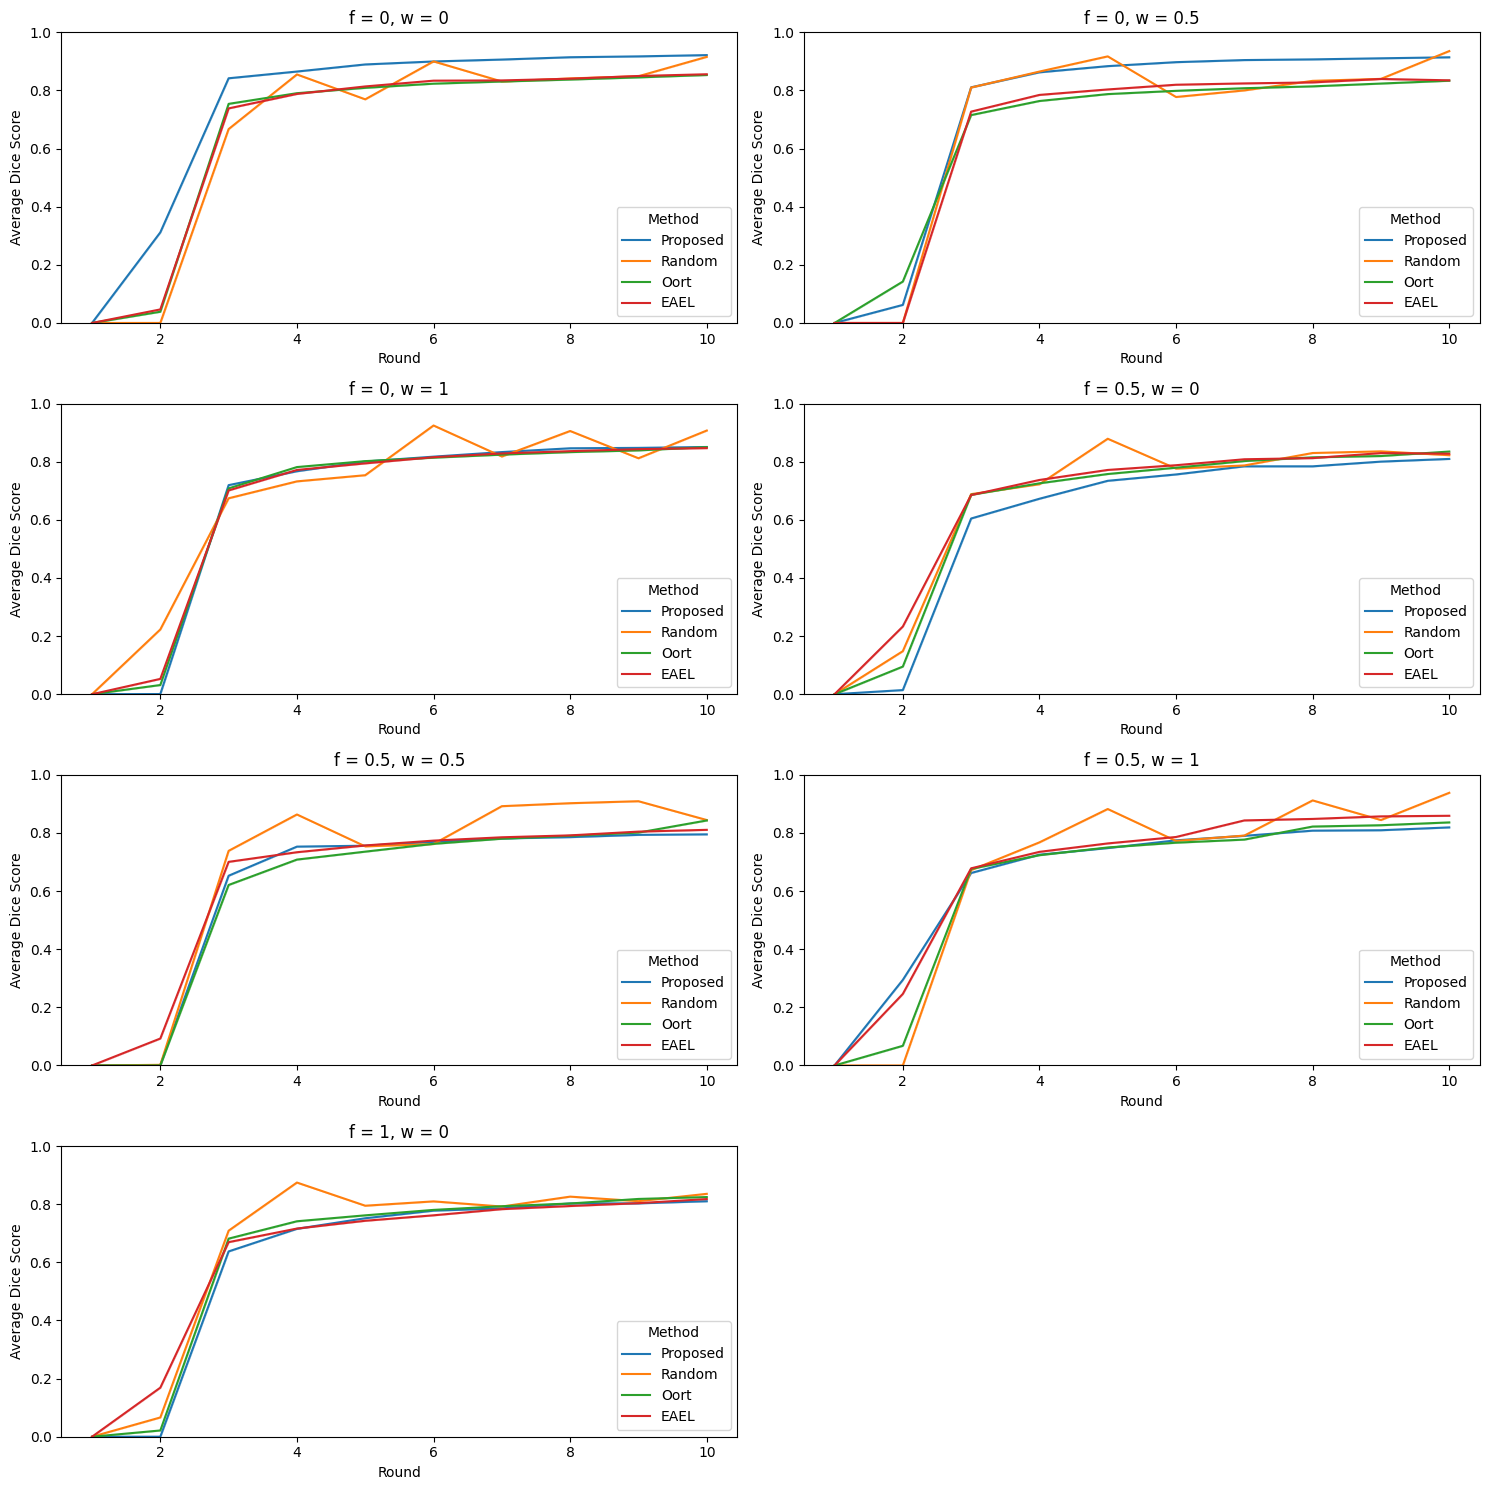

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):
    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 1]
    data = data[data['learning_step'] == 'training']

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['avg_accuracy'] = data.groupby(['method','server_round'])['accuracy'].transform('mean')
    last_acc = data.groupby(['method'])['avg_accuracy'].tail(1)
    print(last_acc)
    # 그래프 그리기
    sns.lineplot(x='server_round', y='avg_accuracy', hue='method', data=data, ax=ax)

    ax.set_xlabel('Round')
    ax.set_ylabel('Average Dice Score')
    ax.set_ylim(0, 1)
    ax.set_title(title)  # 제목 설정
    ax.legend(loc='lower right', title='Method')  # 범례의 제목을 'Method'로 변경 및 위치 설정

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, (data, filename) in enumerate(data_list):
# for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    print(f,w)
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


#테스트 정확도 시간

115    0.949727
231    0.949671
347    0.949591
463    0.951674
Name: avg_accuracy, dtype: float64
115    0.950047
231    0.948851
347    0.949926
463    0.950071
Name: avg_accuracy, dtype: float64
115    0.950013
231    0.949803
347    0.949272
463    0.950035
Name: avg_accuracy, dtype: float64
115    0.946420
231    0.950872
347    0.951256
463    0.949143
Name: avg_accuracy, dtype: float64
115    0.949184
231    0.948976
347    0.948073
463    0.950629
Name: avg_accuracy, dtype: float64
115    0.948866
231    0.948643
347    0.949171
463    0.950057
Name: avg_accuracy, dtype: float64
115    0.949016
231    0.950403
347    0.947751
463    0.950921
Name: avg_accuracy, dtype: float64


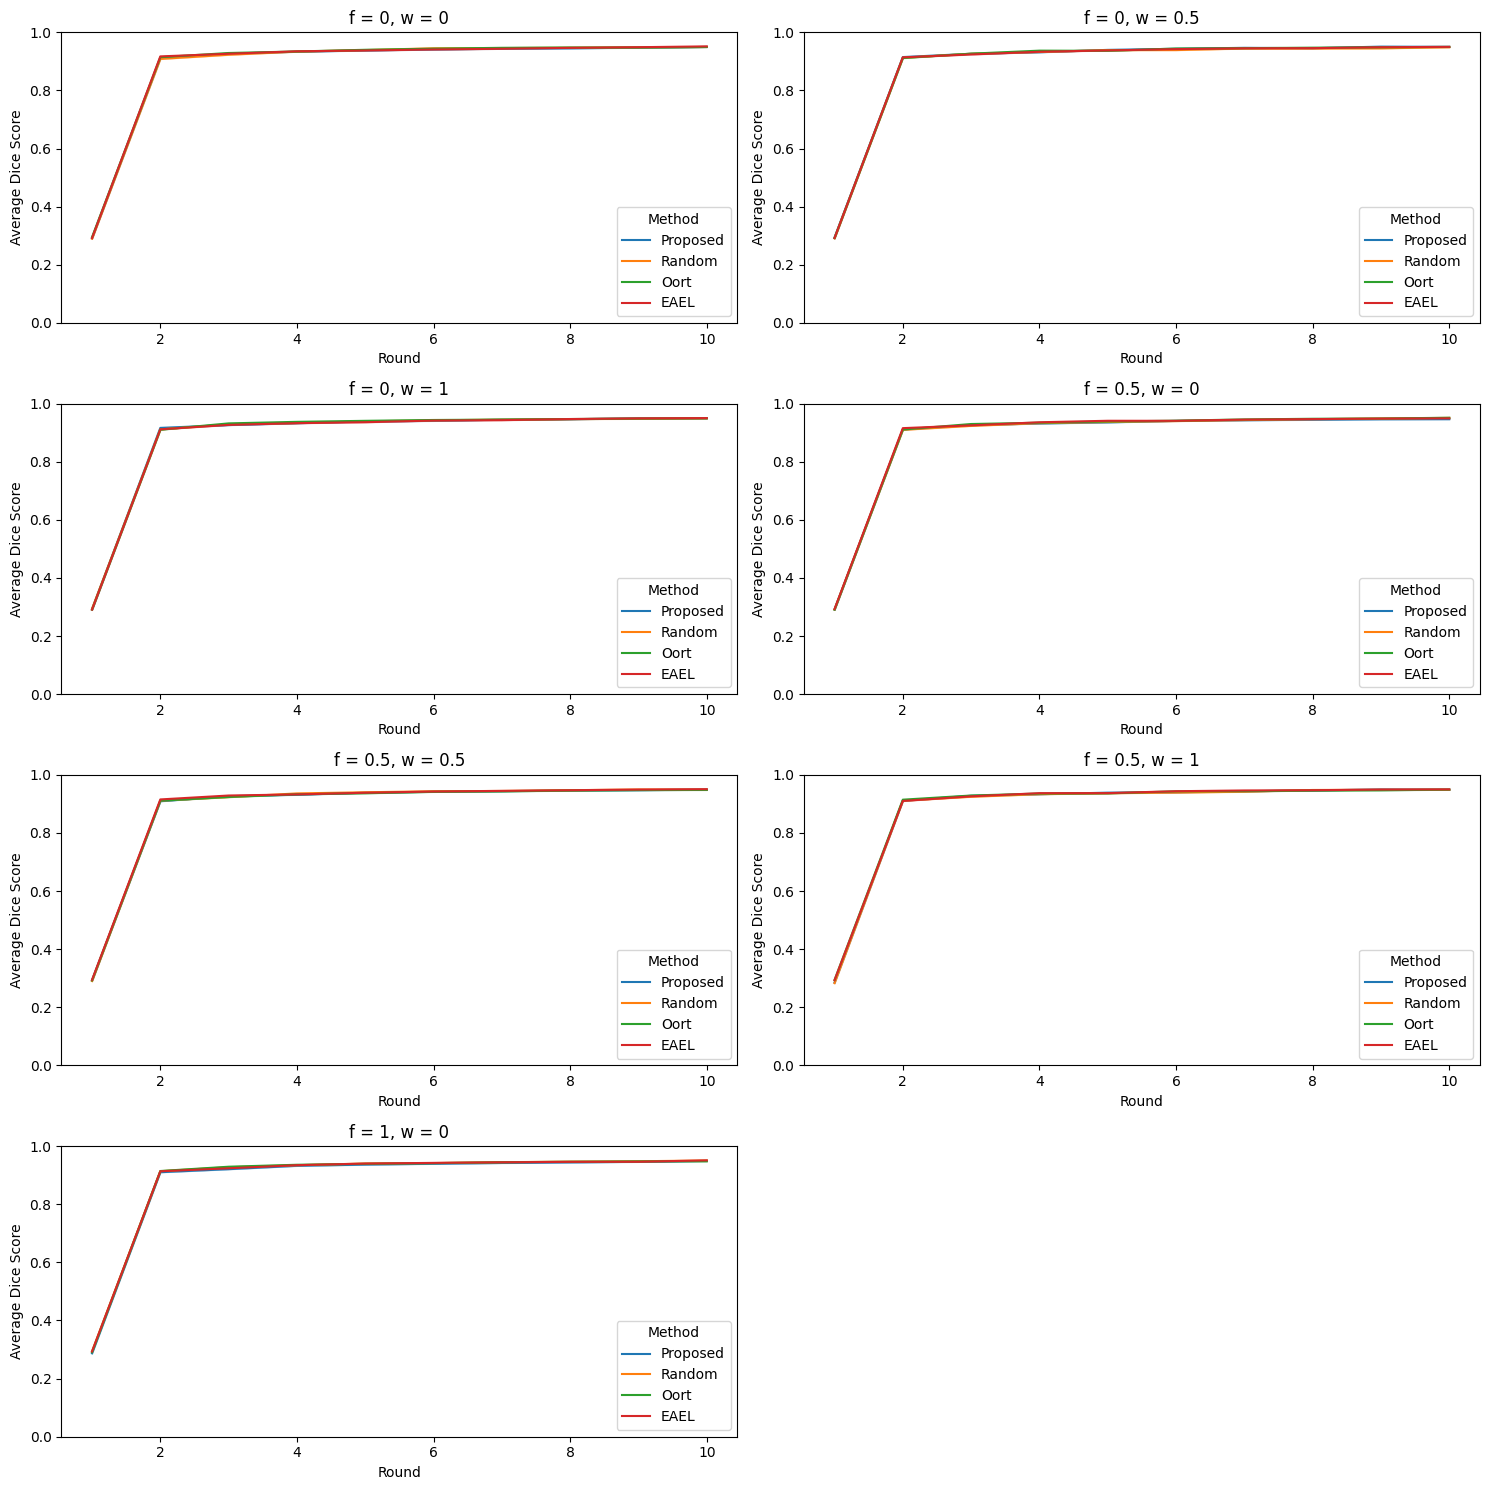

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):

    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 0]
    data = data[data['learning_step'] == 'evaluation']

    # 'method', 'selected', 그리고 'server_round'에 따른 'accuracy'의 평균 계산
    data['avg_accuracy'] = data.groupby(['method','server_round'])['accuracy'].transform('mean')
    last_acc = data.groupby(['method'])['avg_accuracy'].tail(1)
    print(last_acc)
    # 그래프 그리기
    sns.lineplot(x='server_round', y='avg_accuracy', hue='method', data=data, ax=ax)

    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('Round')
    ax.set_ylabel('Average Dice Score')
    ax.set_ylim(0, 1)
    ax.legend(loc='lower right', title='Method')  # 범례의 제목을 'Method'로 변경 및 위치 설정

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


# Loss

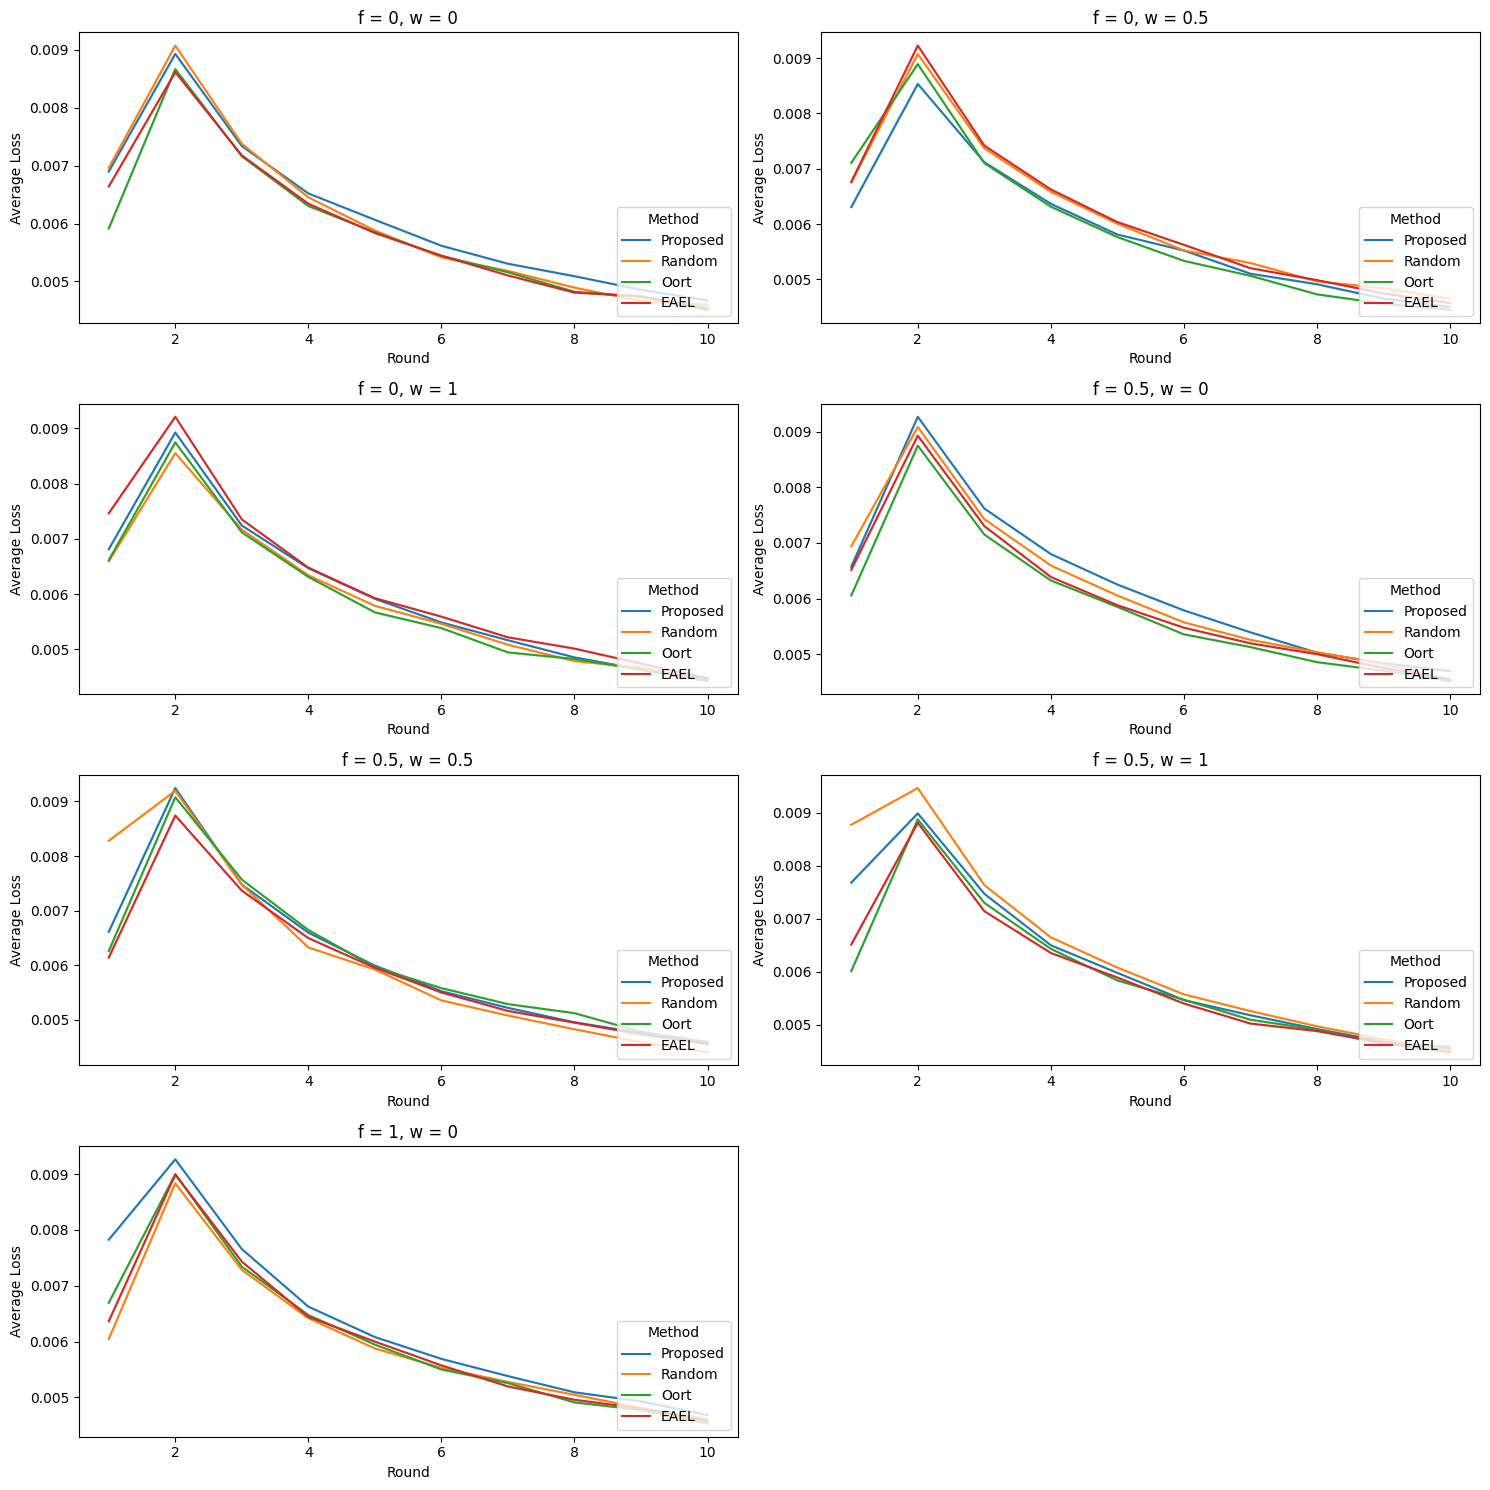

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):

    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 0]
    data = data[data['learning_step'] == 'evaluation']

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['avg_loss'] = data.groupby(['method','server_round'])['loss'].transform('mean')
    
    # 그래프 그리기
    sns.lineplot(x='server_round', y='avg_loss', hue='method', data=data, ax=ax)
    
    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('Round')
    ax.set_ylabel('Average Loss')
    ax.legend(loc='lower right', title='Method')  # 범례의 제목을 'Method'로 변경 및 위치 설정

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


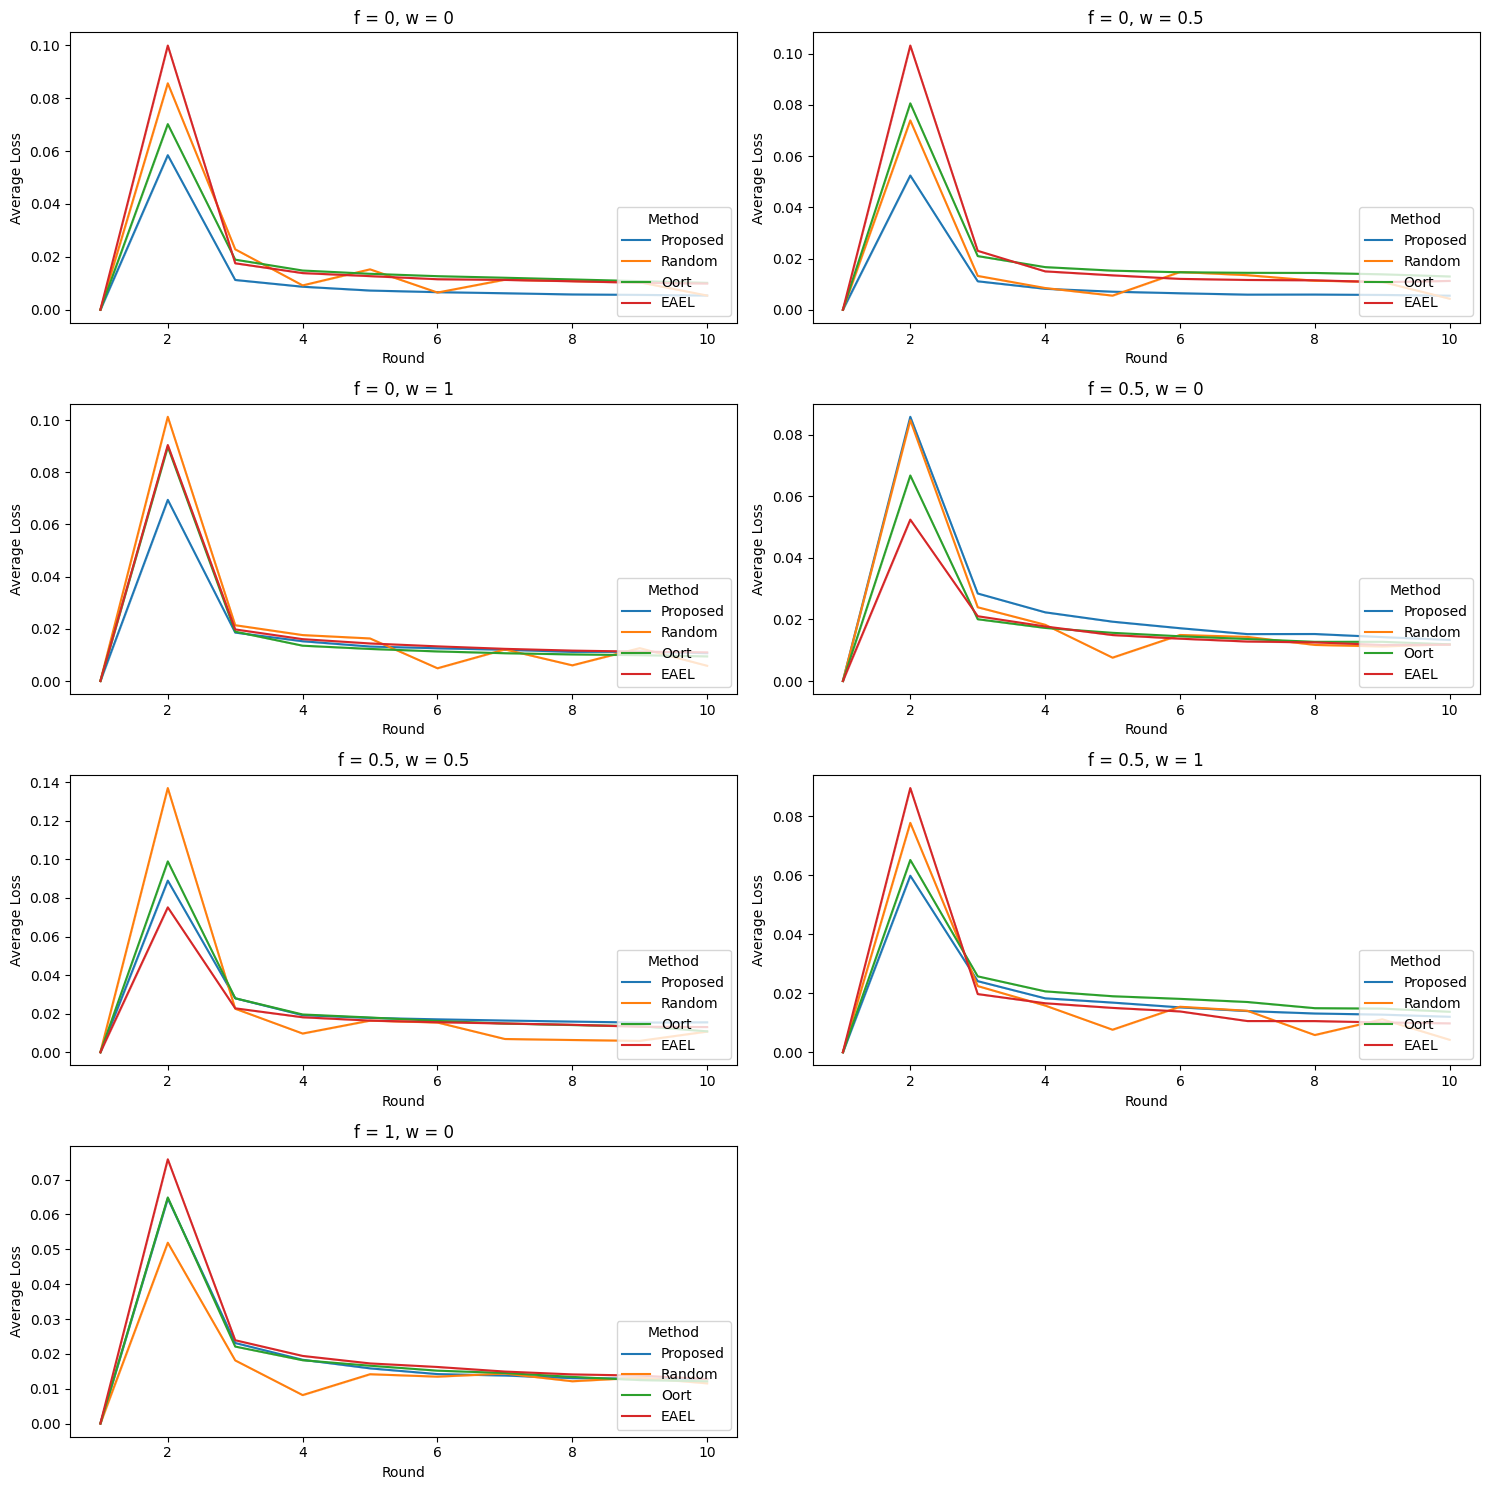

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):

    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 1]
    data = data[data['learning_step'] == 'training']

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['avg_loss'] = data.groupby(['method','server_round'])['loss'].transform('mean')

    # 그래프 그리기
    sns.lineplot(x='server_round', y='avg_loss', hue='method', data=data, ax=ax)
    
    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('Round')
    ax.set_ylabel('Average Loss')
    ax.legend(loc='lower right', title='Method')  # 범례의 제목을 'Method'로 변경 및 위치 설정

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


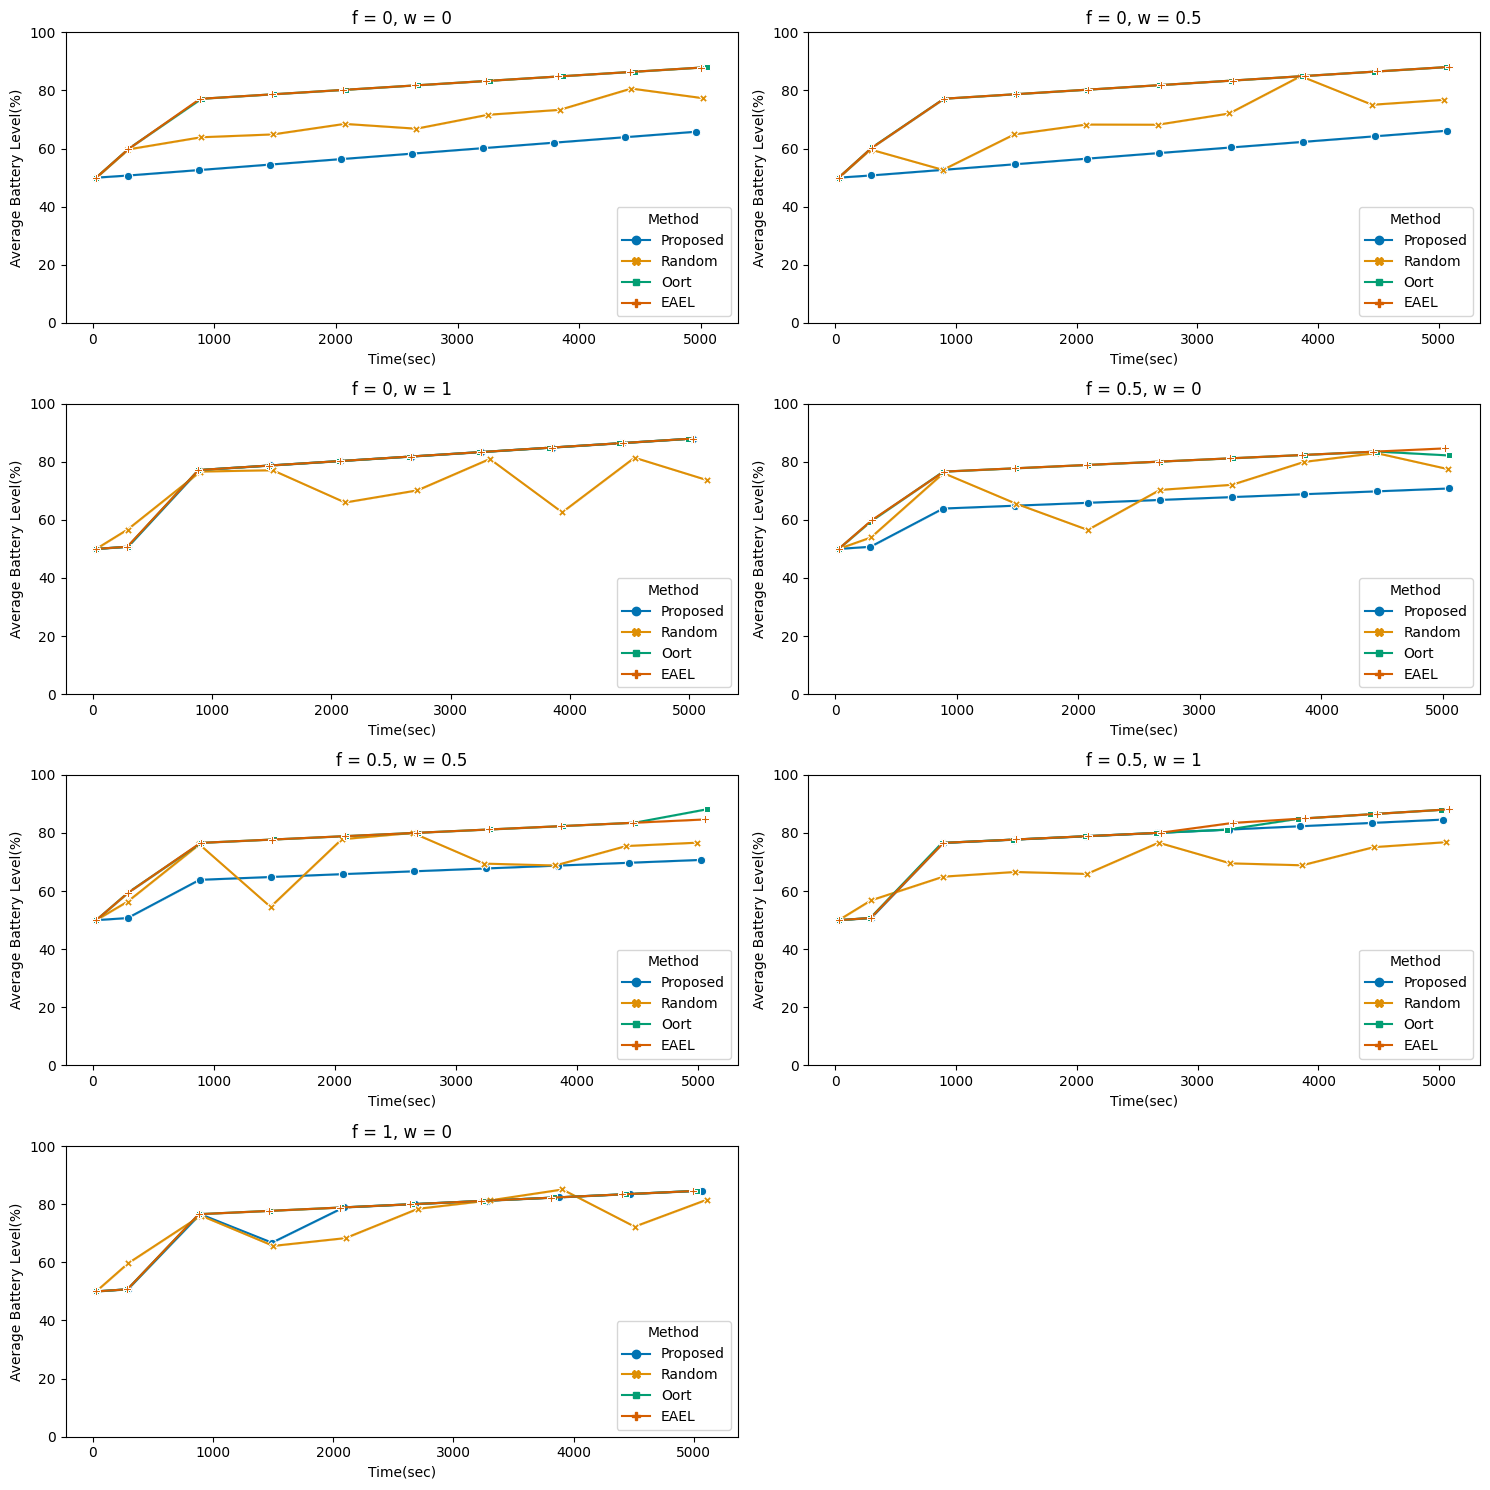

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):


    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 1]
    data = data[data['learning_step'] == 'training']

    # 소수 2번째 자리까지 반올림
    data['c-rate'] = round(data['charge_speed'] / 100, 2)

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['avg_battery_level'] = data.groupby(['method','elapsed_time'])['battery_level'].transform('mean')
    
    sns.lineplot(x='elapsed_time', y='avg_battery_level', hue='method', palette='colorblind', style='method', markers=True, dashes=False, data=data, ax=ax)
    
    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Average Battery Level(%)')
    ax.set_ylim(0, 100)
    ax.legend(loc='lower right', title='Method')  # 범례의 제목을 'Method'로 변경 및 위치 설정

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


457    0.923026
Name: avg_c-rate, dtype: float64
457    0.923026
Name: avg_c-rate, dtype: float64
457    0.826895
Name: avg_c-rate, dtype: float64
457    0.908895
Name: avg_c-rate, dtype: float64
457    0.908895
Name: avg_c-rate, dtype: float64
457    0.821737
Name: avg_c-rate, dtype: float64
457    0.816579
Name: avg_c-rate, dtype: float64


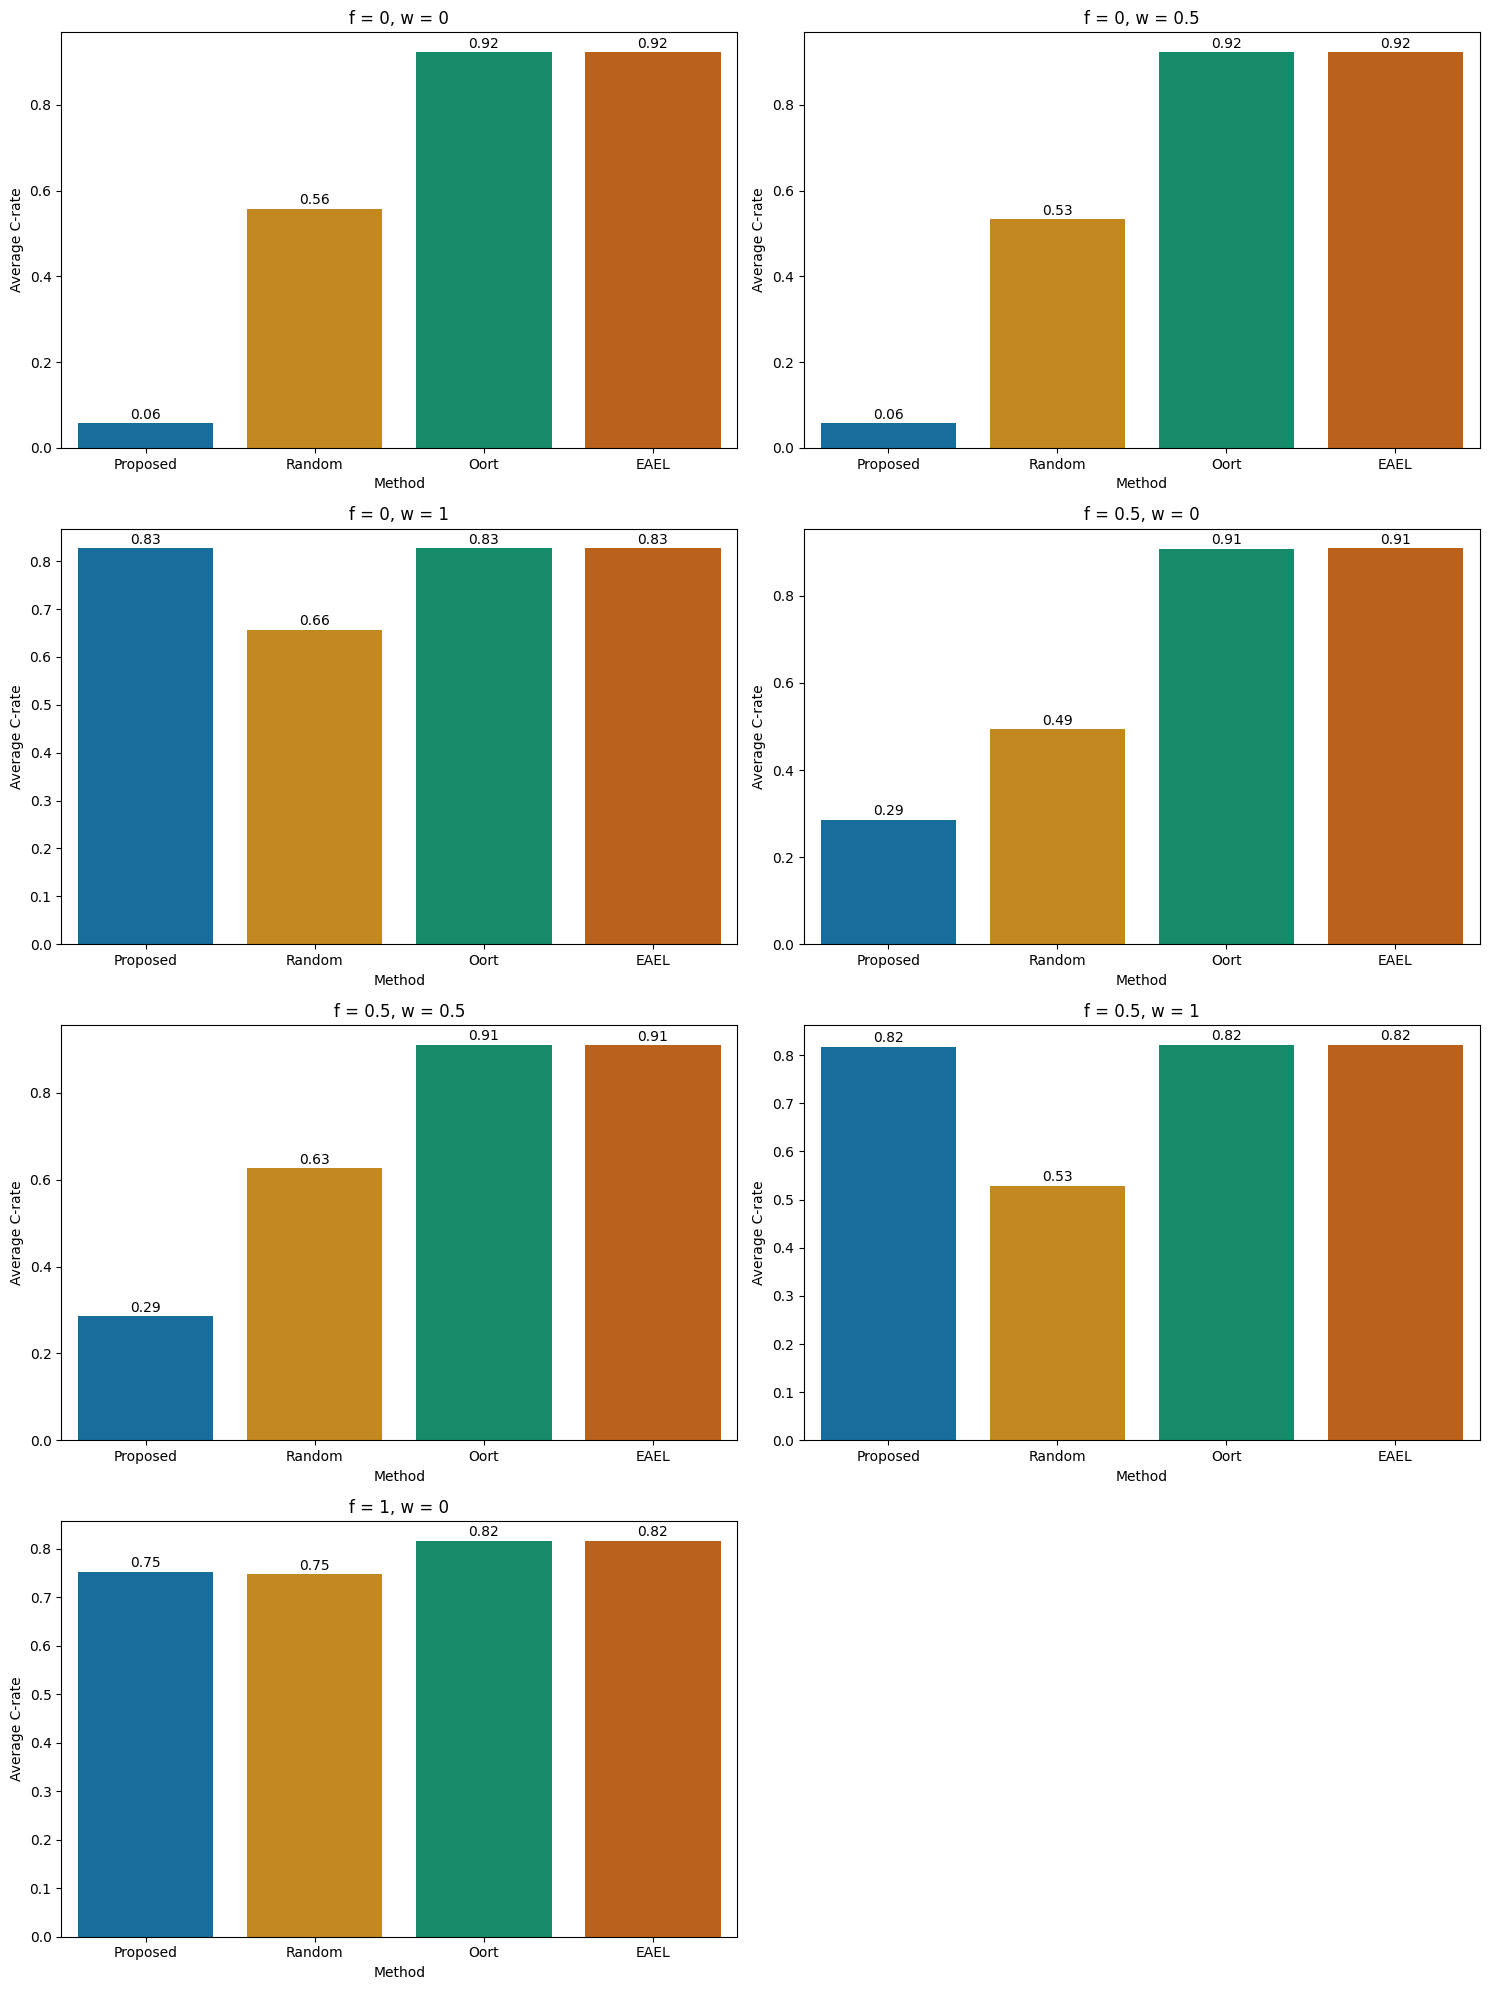

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 파일에서 데이터 읽기
filenames = ['preprocessed_data_0_0.csv', 'preprocessed_data_0_0.5.csv', 'preprocessed_data_0_1.csv',
             'preprocessed_data_0.5_0.csv', 'preprocessed_data_0.5_0.5.csv', 'preprocessed_data_0.5_1.csv',
             'preprocessed_data_1_0.csv']

# 각 데이터프레임을 리스트에 저장
data_list = [(pd.read_csv(filename), filename) for filename in filenames]

# 데이터 처리 및 그래프 그리기 함수
def process_and_plot(data, ax, title):
    # 'selected' 값이 1인 데이터만 선택
    data = data[data['selected'] == 1]
    data = data[data['learning_step'] == 'training']

    data['c-rate'] = data['charge_speed'] / 100

    # 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
    data['avg_c-rate'] = data.groupby(['method'])['c-rate'].transform('mean')
    last_c = data.groupby(['method'])['avg_c-rate'].tail(1)
    print(last_c)
    # 바 그래프 그리기
    sns.barplot(x='method', y='avg_c-rate',  palette='colorblind', data=data, ax=ax)

    # 각 막대에 해당하는 값을 막대 상단에 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2), 
                y = height+0.01, 
                s = '{:.2f}'.format(height),  # 소수점 두 자리까지만 표시
                ha = 'center')

    ax.set_title(title)  # 제목 설정
    ax.set_xlabel('Method')
    ax.set_ylabel('Average C-rate')

# 4x2 서브그래프를 생성하고 각 데이터프레임에 대해 함수를 실행
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for i, (data, filename) in enumerate(data_list):
    row, col = divmod(i, 2)
    _tmp = filename.replace('preprocessed_data_', '')
    f = _tmp.split('_')[0]
    w = _tmp.split('_')[1].replace('.csv', '')
    title = f"f = {f}, w = {w}"   # 파일 이름에서 제목 생성
    
    process_and_plot(data, axs[row][col], title)

# 빈 서브그래프 삭제
fig.delaxes(axs[3,1])
plt.tight_layout()
plt.show()


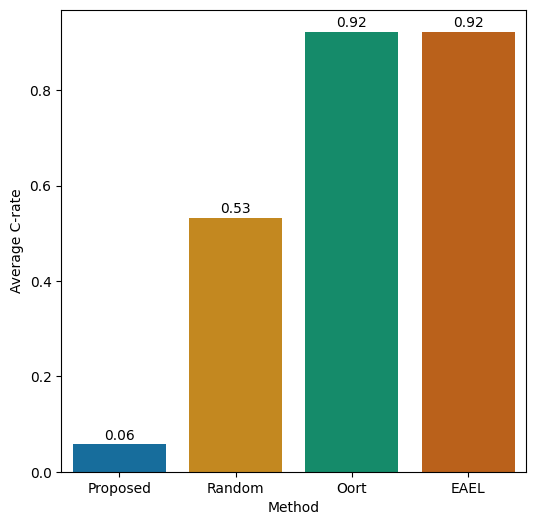

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

data['method'] = data['method'].replace('towards', 'EAEL')
data['method'] = data['method'].replace('oort', 'Oort')
data['method'] = data['method'].replace('proposed', 'Proposed')
data['method'] = data['method'].replace('random', 'Random')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']


data['c-rate'] = data['charge_speed'] / 100

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_c-rate'] = data.groupby(['method'])['c-rate'].transform('mean')

# 바 그래프 그리기
plt.figure(figsize=(6, 6))  # 그래프 크기 설정
ax = sns.barplot(x='method', y='avg_c-rate',  palette='colorblind', data=data)

# 각 막대에 해당하는 값을 막대 상단에 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.01, 
            s = '{:.2f}'.format(height),  # 소수점 두 자리까지만 표시
            ha = 'center')

# plt.title('Average C-rate of selected clients per method')
plt.xlabel('Method')
plt.ylabel('Average C-rate')
plt.show()


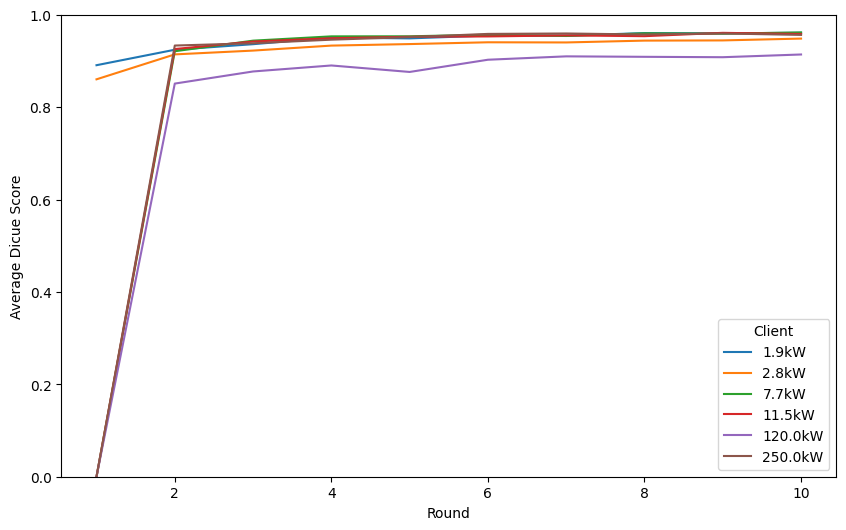

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')
data['method'] = data['method'].replace('towards', 'EAEL')
data['method'] = data['method'].replace('oort', 'Oort')
data['method'] = data['method'].replace('proposed', 'Proposed')
data['method'] = data['method'].replace('random', 'Random')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 0]
data = data[data['learning_step'] == 'evaluation']
data = data[data['method'] == 'Oort']

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['_accuracy'] = data.groupby(['id','server_round'])['accuracy'].transform('mean')

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='server_round', y='_accuracy', hue = 'id', data=data)

plt.xlabel('Round')
plt.ylabel('Average Dicue Score')
plt.ylim(0, 1)
plt.legend(title='Client')  # 범례의 제목을 'Method'로 변경
plt.show()



In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # 가짜 데이터 생성
# np.random.seed(0)
# n_epochs = 100  # 예를 들어, epoch는 100까지 있다고 가정
# methods = ['Oort', 'EAFL', 'Proposed', 'Random']
# omegas = [0, 0.5, 1.0]
# fs = [0.0, 0.5, 1.0]

# data = []
# for method in methods:
#     for omega in omegas:
#         for f in fs:
#             epochs = range(1, n_epochs+1)
#             accuracies = np.cumsum(np.random.gamma(scale=0.01, shape=1, size=n_epochs))  # 선형 증가 + 감마 분포
#             accuracies = accuracies / np.max(accuracies)  # 정규화
#             data.extend(zip([f]*n_epochs, [method]*n_epochs, [omega]*n_epochs, epochs, accuracies))
# df = pd.DataFrame(data, columns=['f', 'method', 'omega', 'epoch', 'accuracy'])


# fig, axes = plt.subplots(3, 2, figsize=(10, 15), sharey='row')

# # 첫 번째 서브플롯에서 Oort, EAFL, 그리고 Random 방법 그리기
# for i, f in enumerate(fs):
#     ax = axes[i, 0]
#     ax.set_title('Oort, EAFL, and Random')
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel(f'f = {f}\nAccuracy')
    
#     for method in ['Oort', 'Random']:
#         temp_df = df[(df['method'] == method)]
#         avg_accuracy = temp_df.groupby('epoch')['accuracy'].mean()
#         ax.plot(avg_accuracy.index, avg_accuracy, label=method)
    
#     temp_df = df[(df['f'] == f) & (df['method'] == 'EAFL')]
#     avg_accuracy = temp_df.groupby('epoch')['accuracy'].mean()
#     ax.plot(avg_accuracy.index, avg_accuracy, label='EAFL')
#     ax.legend()

# # 두 번째 서브플롯에서 Proposed 방법 그리기
# for i, f in enumerate(fs):
#     ax.set_title('Proposed')
#     ax = axes[i, 1]
#     ax.set_xlabel('Epoch')
        
#     for omega in omegas:
#         temp_df = df[(df['f'] == f) & (df['method'] == 'Proposed') & (df['omega'] == omega)]
#         sns.lineplot(x='epoch', y='accuracy', data=temp_df, ax=ax, label=f'omega={omega}')
    
#     ax.legend()

# plt.tight_layout()
# plt.show()
